In [1]:
import gc
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas(desc='pandas bar')
pd.set_option('display.max_columns', None)

In [2]:
y_q3 = pd.read_csv('data/y_Q3.csv')
y_q4 = pd.read_csv('data/y_Q4.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

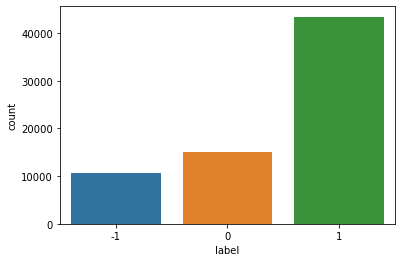

In [3]:
sns.countplot(y_q3.label)

<AxesSubplot:xlabel='label', ylabel='count'>

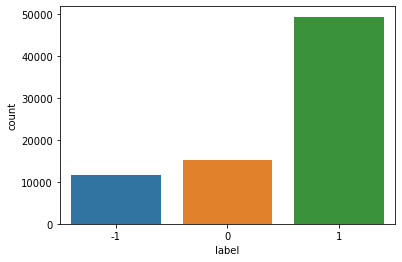

In [4]:
sns.countplot(y_q4.label)

# 1. 用户资产数据
* cust_no：用户id
* X1：结构性存余额
* X2：定期存款余额
* X3：活期存款余额
* X4：理财余额
* X5：基金余额
* X6：资管余额
* X7：贷款余额
* X8：大额存单余额

In [5]:
aum = pd.read_pickle('data/aum_month.pkl')
aum.head()

,cust_no,X1,X2,X3,X4,X5,X6,X7,X8,year,month
0,0xb2d67148,0.0,0.0,0.00,0,0.0,0.0,0.0,0,2019,10
1,0xb2d06707,0.0,0.0,0.00,0,0.0,0.0,0.0,0,2019,10
2,0xb2d7a54f,0.0,0.0,0.00,0,0.0,0.0,0.0,0,2019,10
3,0xb2d3d976,27000.0,0.0,25037.87,50000,0.0,0.0,0.0,0,2019,10
4,0xb2d1abaf,0.0,0.0,0.00,0,0.0,0.0,0.0,0,2019,10


In [6]:
aum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829297 entries, 0 to 4829296
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_no  object 
 1   X1       float64
 2   X2       float64
 3   X3       float64
 4   X4       int64  
 5   X5       float64
 6   X6       float64
 7   X7       float64
 8   X8       int64  
 9   year     int64  
 10  month    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 405.3+ MB


In [7]:
aum.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,year,month
count,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06
mean,4.713779e+04,3.328802e+03,5.195052e+03,3.846162e+03,2.063686e+02,3.710618e+02,6.122424e+04,1.112194e+04,2.019377e+03,6.750904e+00
std,1.562907e+06,5.300424e+05,2.334613e+05,1.072641e+05,1.300463e+04,4.104441e+04,6.380637e+05,2.038743e+05,4.845721e-01,3.922939e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,3.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,8.000000e+00
75%,0.000000e+00,0.000000e+00,5.030000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+01
max,3.470000e+08,3.372508e+08,1.420225e+08,6.800000e+07,1.000000e+07,4.086245e+07,3.475000e+07,1.500000e+08,2.020000e+03,1.200000e+01


In [8]:
aum.isna().sum() / aum.shape[0]

cust_no    0.0
X1         0.0
X2         0.0
X3         0.0
X4         0.0
X5         0.0
X6         0.0
X7         0.0
X8         0.0
year       0.0
month      0.0
dtype: float64

# 2. 月户行为数据
* cust_no：用户id
* B1：手机银行登录次数
* B2：转账转入次数
* B3：转账转入金额
* B4：转账转出次数
* B5：转账转出金额
* B6：最近一次交易时间（3,6,9,12月有）
* B7：季度内动账次数（3,6,9,12月有）

In [9]:
behavior = pd.read_pickle('data/behavior_month.pkl')
behavior.head()

,cust_no,B1,B2,B3,B4,B5,year,month,B6,B7
0,0xb2d5b142,0,1,2264.0,0,0.0,2019,11,NaT,NaN
1,0xb2d5e978,3,0,0.0,1,1633.0,2019,11,NaT,NaN
2,0xb2d55064,0,0,0.0,0,0.0,2019,11,NaT,NaN
3,0xb2d1a472,0,0,0.0,0,0.0,2019,11,NaT,NaN
4,0xb2d1d306,0,0,0.0,0,0.0,2019,11,NaT,NaN


In [10]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829297 entries, 0 to 4829296
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   cust_no  object        
 1   B1       int64         
 2   B2       int64         
 3   B3       float64       
 4   B4       int64         
 5   B5       float64       
 6   year     int64         
 7   month    int64         
 8   B6       datetime64[ns]
 9   B7       float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 368.4+ MB


In [11]:
behavior.describe()

,B1,B2,B3,B4,B5,year,month,B7
count,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,4.829297e+06,1.696888e+06
mean,9.359971e-01,2.568277e-01,3.475187e+04,1.732494e-01,2.445247e+04,2.019377e+03,6.750904e+00,3.908091e+00
std,5.149736e+00,3.622997e+00,1.678166e+06,4.131330e+00,1.434932e+06,4.845721e-01,3.922939e+00,2.949635e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,8.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+01,0.000000e+00
max,7.530000e+02,2.581000e+03,9.276983e+08,4.047000e+03,9.287193e+08,2.020000e+03,1.200000e+01,1.004200e+04


In [12]:
behavior.isna().sum() / behavior.shape[0]

cust_no    0.000000
B1         0.000000
B2         0.000000
B3         0.000000
B4         0.000000
B5         0.000000
year       0.000000
month      0.000000
B6         0.914564
B7         0.648626
dtype: float64

# 3. 月户存款数据
* cust_no
* C1：存款产品金额
* C2：存款产品个数

In [13]:
cunkuan = pd.read_pickle('data/cunkuan_month.pkl')
cunkuan.head()

,cust_no,C1,C2,year,month
0,0xb2d3ad96,231097.73,6,2019,11
1,0xb2d636da,600098.92,7,2019,11
2,0xb2d37469,0.00,1,2019,11
3,0xb2d636d4,0.31,1,2019,11
4,0xb2d3d20b,140007.62,3,2019,11


In [14]:
cunkuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989843 entries, 0 to 1989842
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_no  object 
 1   C1       float64
 2   C2       int64  
 3   year     int64  
 4   month    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 75.9+ MB


In [15]:
cunkuan.describe()

,C1,C2,year,month
count,1.989843e+06,1.989843e+06,1.989843e+06,1.989843e+06
mean,1.605409e+05,1.619737e+00,2.019377e+03,6.769590e+00
std,2.586990e+06,2.657780e+00,4.847154e-01,3.972314e+00
min,0.000000e+00,1.000000e+00,2.019000e+03,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.019000e+03,3.000000e+00
50%,3.200000e+01,1.000000e+00,2.019000e+03,8.000000e+00
75%,3.541355e+03,1.000000e+00,2.020000e+03,1.000000e+01
max,3.470000e+08,4.130000e+02,2.020000e+03,1.200000e+01


In [16]:
cunkuan.isna().sum() / cunkuan.shape[0]

cust_no    0.0
C1         0.0
C2         0.0
year       0.0
month      0.0
dtype: float64

# 4. 用户重要事件
* cust_no：用户id
* E1：开户日期
* E2：网银开户日期
* E3：手机app开户日期
* E4：第一次登陆网银日期
* E5：第一次手机app登录日期
* E6：第一次活期存款业务日期
* E7：第一次定期存款业务日期
* E8：第一次贷款业务日期
* E9：第一次逾期日期
* E10：第一次资金业务交易日期
* E11：第一次银证转账日期
* E12：第一次柜台转账日期
* E13：第一次网银转账日期
* E14：第一次手机app转账日期
* E15：转出他行最大一笔金额
* E16：转出他行最大一笔金额发生日期
* E17：他行转入最大一笔金额
* E18：他行转入最大一笔金额发生日期

In [17]:
event = pd.read_pickle('data/event_season.pkl')
event.head()

,cust_no,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,year,season
0,0xb2d53438,2018-08-06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.0,NaT,0.0,NaT,2019,4
1,0xb2d10cbd,2015-10-20,2015-10-20,2015-10-20,2015-10-27,NaT,NaT,NaT,NaT,NaT,2016-02-03,NaT,NaT,NaT,NaT,0.0,NaT,120000.0,2015-10-22,2019,4
2,0xb2d594c5,2018-09-25,2018-09-25,2018-09-25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.0,NaT,0.0,NaT,2019,4
3,0xb2d9ee51,2019-11-19,2019-11-19,2019-11-19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.0,NaT,0.0,NaT,2019,4
4,0xb2d7bb80,2019-08-14,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.0,NaT,0.0,NaT,2019,4


In [18]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696888 entries, 0 to 1696887
Data columns (total 21 columns):
 #   Column   Dtype         
---  ------   -----         
 0   cust_no  object        
 1   E1       datetime64[ns]
 2   E2       datetime64[ns]
 3   E3       datetime64[ns]
 4   E4       datetime64[ns]
 5   E5       datetime64[ns]
 6   E6       datetime64[ns]
 7   E7       datetime64[ns]
 8   E8       datetime64[ns]
 9   E9       datetime64[ns]
 10  E10      datetime64[ns]
 11  E11      datetime64[ns]
 12  E12      datetime64[ns]
 13  E13      datetime64[ns]
 14  E14      datetime64[ns]
 15  E15      float64       
 16  E16      datetime64[ns]
 17  E17      float64       
 18  E18      datetime64[ns]
 19  year     int64         
 20  season   int64         
dtypes: datetime64[ns](16), float64(2), int64(2), object(1)
memory usage: 271.9+ MB


In [19]:
event.describe()

,E15,E17,year,season
count,1.696888e+06,1.696888e+06,1.696888e+06,1.696888e+06
mean,1.378506e+05,1.263142e+05,2.019389e+03,2.543031e+00
std,1.745257e+06,2.022830e+06,4.874609e-01,1.290955e+00
min,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00
25%,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00
50%,0.000000e+00,0.000000e+00,2.019000e+03,3.000000e+00
75%,0.000000e+00,0.000000e+00,2.020000e+03,4.000000e+00
max,3.000000e+08,5.000000e+08,2.020000e+03,4.000000e+00


In [20]:
event.isna().sum() / event.shape[0]

cust_no    0.000000
E1         0.000017
E2         0.408660
E3         0.408660
E4         0.902738
E5         0.749899
E6         0.671930
E7         0.995268
E8         0.930072
E9         0.996435
E10        0.611257
E11        1.000000
E12        0.934218
E13        0.961892
E14        0.849890
E15        0.000000
E16        0.834413
E17        0.000000
E18        0.824670
year       0.000000
season     0.000000
dtype: float64

# 5. 用户信息
* cust_no：用户id
* I1：性别
* I2：年龄
* I3：客户等级
* I4：本行员工标志
* I5：职业描述
* I6：我行贷款客户标签
* I7：本行产品持有数
* I8：星座描述
* I9：客户贡献度
* I10：学历描述
* I11：家庭年收入
* I12：行业描述
* I13：婚姻状况描述
* I14：职务描述
* I15：二维码收单客户标志
* I16：vip客户标志
* I17：网银客户标志
* I18：手机银行客户标志
* I19：短信客户
* I20：微信支付客户标志

In [21]:
info = pd.read_pickle('data/custinfo_season.pkl')
info.head()

,cust_no,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,year,season
0,0xb2d5fd8e,男性,26,普通客户,0.0,商业工作人员,0,0,白羊座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0,2020,1
1,0xb2d811d2,男性,25,普通客户,0.0,不便分类的其他从业人员,0,0,天蝎座,NaN,未知,0.0,个人,未说明的婚姻状况,未知,0,0.0,0,0,0,0,2020,1
2,0xb2d8b1c8,女性,43,普通客户,0.0,商业工作人员,0,0,水瓶座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,0,0,0,0,2020,1
3,0xb2db077a,女性,58,普通客户,0.0,服务性工作人员,0,0,双鱼座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0,2020,1
4,0xb2da6784,男性,24,普通客户,0.0,服务性工作人员,0,0,双子座,NaN,NaN,0.0,个人,NaN,NaN,0,0.0,1,1,1,0,2020,1


In [22]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696888 entries, 0 to 1696887
Data columns (total 23 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust_no  object 
 1   I1       object 
 2   I2       int64  
 3   I3       object 
 4   I4       float64
 5   I5       object 
 6   I6       int64  
 7   I7       int64  
 8   I8       object 
 9   I9       float64
 10  I10      object 
 11  I11      float64
 12  I12      object 
 13  I13      object 
 14  I14      object 
 15  I15      int64  
 16  I16      float64
 17  I17      int64  
 18  I18      int64  
 19  I19      int64  
 20  I20      int64  
 21  year     int64  
 22  season   int64  
dtypes: float64(4), int64(10), object(9)
memory usage: 297.8+ MB


In [23]:
info.isna().sum() / info.shape[0]

cust_no    0.000000
I1         0.111567
I2         0.000000
I3         0.000017
I4         0.000017
I5         0.184554
I6         0.000000
I7         0.000000
I8         0.000017
I9         1.000000
I10        0.818054
I11        0.000000
I12        0.000335
I13        0.898683
I14        0.830501
I15        0.000000
I16        0.000017
I17        0.000000
I18        0.000000
I19        0.000000
I20        0.000000
year       0.000000
season     0.000000
dtype: float64

In [24]:
info.I1.value_counts() / info.shape[0]

男性    0.533950
女性    0.354483
Name: I1, dtype: float64

In [25]:
info.I2.describe()

count    1.696888e+06
mean     3.875972e+01
std      1.941020e+01
min     -7.954000e+03
25%      2.800000e+01
50%      3.500000e+01
75%      4.700000e+01
max      1.020000e+03
Name: I2, dtype: float64

<AxesSubplot:xlabel='I2', ylabel='count'>

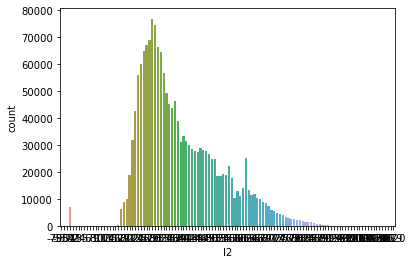

In [26]:
sns.countplot(info.I2)

In [27]:
info.I3.value_counts() / info.shape[0]

普通客户    0.924596
黄金      0.055663
白金      0.017824
钻石      0.001900
Name: I3, dtype: float64

In [28]:
info.I4.value_counts() / info.shape[0]

0.0    0.989613
1.0    0.010370
Name: I4, dtype: float64

In [29]:
info.I5.value_counts() / info.shape[0]

不便分类的其他从业人员             0.268447
商业工作人员                  0.158838
服务性工作人员                 0.138897
办事人员和有关人员               0.070128
专业技术人员                  0.061339
国家机关、党群组织、企业、事业单位负责人    0.045222
生产、运输设备操作人员及有关人员        0.036641
未知                      0.019794
农、林、牧、渔、水利业生产人员         0.010155
私营业主                    0.004920
军人                      0.000738
退休                      0.000143
主妇                      0.000092
公司管理人员                  0.000041
执行官                     0.000019
公务员                     0.000011
其他                      0.000006
业主/自营企业                 0.000005
总监/经理                   0.000004
会计师                     0.000002
工程师                     0.000002
公司职员                    0.000002
Name: I5, dtype: float64

In [30]:
info.I6.value_counts() / info.shape[0]

0    0.928346
1    0.071654
Name: I6, dtype: float64

In [31]:
info.I7.describe()

count    1696888.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: I7, dtype: float64

In [32]:
info.I8.value_counts() / info.shape[0]

天秤座    0.103292
天蝎座    0.093110
处女座    0.089751
狮子座    0.085260
摩羯座    0.084485
双鱼座    0.081481
水瓶座    0.081120
射手座    0.080857
巨蟹座    0.078371
双子座    0.076332
金牛座    0.074851
白羊座    0.071071
Name: I8, dtype: float64

In [33]:
info.I9.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: I9, dtype: float64

In [34]:
info.I10.value_counts() / info.shape[0]

未知          0.095681
大学本科        0.031427
专科教育        0.019219
普通高级中学教育    0.012321
初级中学教育      0.008760
中等职业教育      0.007656
研究生教育       0.004350
小学教育        0.002165
技工学校毕业      0.000321
文盲或半文盲      0.000047
Name: I10, dtype: float64

In [35]:
info.I11.describe()

count    1.696888e+06
mean     3.521752e+04
std      7.545359e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.774878e+08
Name: I11, dtype: float64

In [36]:
info.I12.value_counts() / info.shape[0]

个人                  0.999645
农业                  0.000004
批发业                 0.000004
文教、工美、体育和娱乐用品制造业    0.000002
建材批发                0.000002
专业技术服务业             0.000002
零售业                 0.000002
公共设施管理业             0.000002
房地产开发经营             0.000002
林业                  0.000002
Name: I12, dtype: float64

In [37]:
info.I13.value_counts() / info.shape[0]

未说明的婚姻状况    0.089057
已婚          0.006964
未婚          0.005002
离婚          0.000204
其他          0.000069
丧偶          0.000021
Name: I13, dtype: float64

In [38]:
info.I14.value_counts() / info.shape[0]

未知                                0.089357
高级领导(行政级别局级及局级以上领导或大公司高级管理人员)     0.036348
其他                                0.014964
一般员工                              0.014910
中级领导(行政级别局级以下处级以上领导或大公司中级管理人员)    0.011370
初级领导(行政级别处级以下领导或大公司初级管理人员)        0.002549
Name: I14, dtype: float64

In [39]:
info.I15.value_counts() / info.shape[0]

0    0.994785
1    0.005215
Name: I15, dtype: float64

In [40]:
info.I16.value_counts() / info.shape[0]

0.0    0.924596
1.0    0.075387
Name: I16, dtype: float64

In [41]:
info.I17.value_counts() / info.shape[0]

1    0.593063
0    0.406937
Name: I17, dtype: float64

In [42]:
info.I18.value_counts() / info.shape[0]

1    0.593063
0    0.406937
Name: I18, dtype: float64

In [43]:
info.I19.value_counts() / info.shape[0]

1    0.697756
0    0.302244
Name: I19, dtype: float64

In [44]:
info.I20.value_counts() / info.shape[0]

0    0.884761
1    0.115239
Name: I20, dtype: float64